<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller: Reconocimiento facial con K-medias y K-medoides

En este caso-taller vamos a aplicar K-medias y K-medoides para agrupar rostros de indiviudos. Utilizaremos la base de datos conocida como Caras Olivetti. Esta base contiene diez imágenes diferentes de  40 personas distintas. Para algunas personas, las imágenes se tomaron en diferentes momentos, variando la iluminación, las expresiones faciales (ojos abiertos/cerrados, sonriendo/sin sonreír) y los detalles faciales (gafas/sin gafas). Todas las imágenes fueron tomadas contra un fondo homogéneo oscuro con los sujetos en una posición frontal erguida (con tolerancia a algún movimiento lateral). Esta base viene incluida dentro de la libraría `scikit-learn` y fueron provistas por T&T Laboratories Cambridge para que la comunidad académica la utilice para la evaluación de modelos predictivos. 

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

Los datos pueden ser bajados directamente utilizando la librería `scikit-learn`,  la función que le permite hacer esto es `fetch_olivetti_faces`. 

In [1]:
# Utilice este espacio para escribir el código.
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

faces=datasets.fetch_olivetti_faces()#data_home=None, shuffle=False, random_state=0, download_if_missing=True, return_X_y='True')

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\linam\scikit_learn_data


Importamos la función de datasets se scikit-learn y llamamos el dataset requerido.

### 2.  Análisis preliminar 

#### 2.1. Describa los contenidos de la base de datos, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

In [2]:
# Utilice este espacio para escribir el código.
print(faces.DESCR)
print(faces.images.shape)


.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

Esta base de datos, contiene imágenes de 40 personas distintas en un proyecto que empezó 1992 y finalizó en 1994. El set de datos puede tener fotos tomadas en diferentes fechas, con variaciones de luz, expresiones faciales o accesorios.
- Número de clases: 40
- Número de muestras por clase: 10
- Número de muestras: 400
- Píxeles: 64 x 64
Créditos: AT&T Laboratories Cambridge


#### 2.2. Genere una figura con una imágen de cada uno de los individuos

In [3]:
# Utilice este espacio para escribir el código.
#Primero, convertimos los datos a un dataFrame para poderlos trabajar más facilmente
X = faces.data
X = pd.DataFrame(X)

y = faces.target
y = pd.DataFrame(y, columns=['pid']) # pid es el ID de la persona 

df = y.join(X)
df.head()

,pid,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554


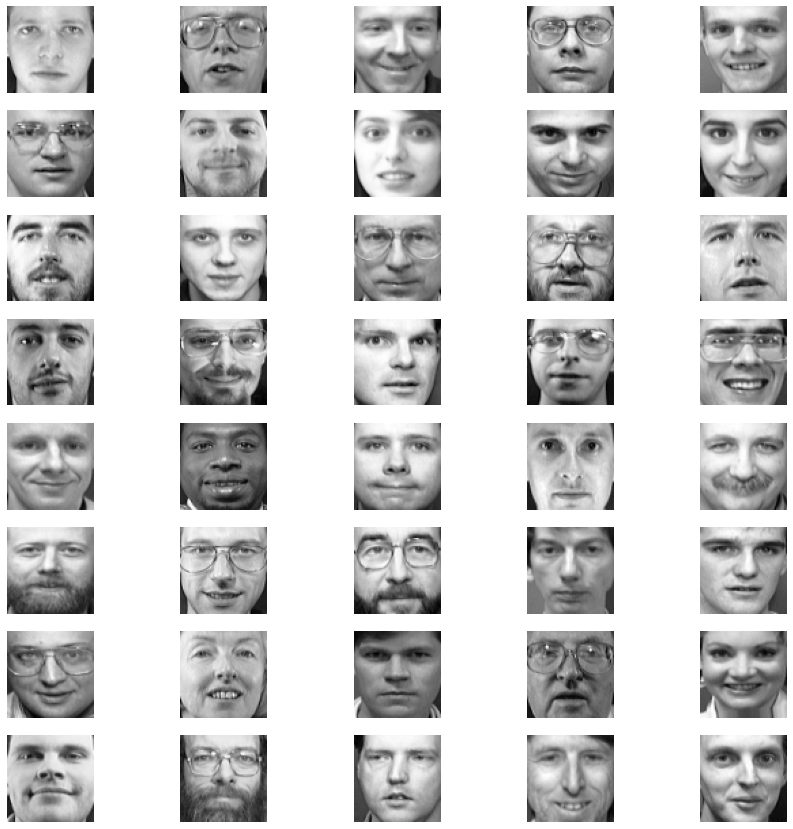

In [4]:
sujeto=df['pid'].unique()

sujetos = []

for s in sujeto:

    sujetos.append(df[df['pid'] == s].drop('pid', axis=1).values[0])

n_images = 40

n_cols = 5

n_rows = 8

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
for i, ax in enumerate(axes.ravel()):

    if i < n_images:

        ax.imshow(sujetos[i].reshape((64, 64)), cmap='gray')

        ax.axis('off')

    else:

        ax.remove()

plt.show()


Convertimos los datos iniciales en Data frame para manejarlos mejor, y generamos 5 columnas con una imagen de cada una de las personas que se contienen en la base

#### 2.3. Transforme las imágenes en un data frame donde cada columna contiene los valores estandarizados del nivel de gris en la imagen y una columna con la etiqueta de cada imagen. 

In [5]:
# Utilice este espacio para escribir el código.
X = faces.data
X = pd.DataFrame(X)

y = faces.target
y = pd.DataFrame(y, columns=['pid']) # pid es el ID de la persona 
media=X.mean()
des_est=X.std()
estandarizado= (X-media)/des_est
df_std=pd.concat([y,estandarizado],axis=1)
df_std

,pid,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,-0.499279,-0.350742,-0.302582,-0.394867,-0.137436,0.104823,0.213029,0.194650,0.171179,...,1.832118,1.661707,1.596079,1.619697,0.725518,-1.090724,-0.958362,-0.897152,-0.830481,-0.849394
1,0,0.301122,0.194397,0.185454,0.203658,0.213138,0.290042,0.361396,0.354582,0.311145,...,-1.374433,-1.155804,-1.248068,-1.095583,-1.006535,-0.981553,-0.937202,-0.897152,-0.875490,-0.872270
2,0,-0.453541,-0.176297,0.079359,0.054027,0.169316,0.382651,0.361396,0.247960,0.255159,...,-1.750200,-1.292135,-0.997783,-1.161275,-1.139769,-1.003387,-0.979523,-0.963148,-0.897995,-0.872270
3,0,-1.116730,-1.266574,-1.448407,-1.677422,-1.934122,-2.233557,-2.259746,-1.564604,-1.228480,...,1.756964,1.479932,1.618832,1.751081,2.080073,2.140728,2.194560,2.292623,2.387691,2.376150
4,0,0.552676,0.586897,0.546177,0.545673,0.497978,0.567869,0.435579,0.434548,0.395124,...,-1.048767,-1.133082,-1.020536,-0.964199,-0.873300,-0.850548,-0.810239,-0.765162,-0.762967,-0.757889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,0.003830,0.325230,0.482520,0.588425,0.497978,0.290042,0.237757,-0.071904,0.003220,...,0.153689,0.162064,-0.542720,-1.358352,-0.851094,-0.501202,-0.450509,-0.853155,-0.852985,-0.963775
396,39,-0.179118,-0.350742,-0.642086,-1.121648,-1.627371,-1.909425,-1.517913,-0.871565,-0.612630,...,0.103587,-0.178764,-0.406201,-0.372968,-0.007273,0.350329,0.628679,0.884722,1.082418,1.323845
397,39,0.552676,0.521480,0.673491,0.567049,0.541800,0.243737,0.213029,0.141339,0.059206,...,-1.023716,-1.201248,-1.157055,-1.029891,-0.962123,-0.872383,-0.916041,-0.765162,-0.897995,-0.666384
398,39,-1.025256,-1.135741,-1.321093,-1.527791,-1.824568,-2.164100,-2.061924,-1.591259,-1.200487,...,0.504405,0.139342,0.026110,0.283954,0.747724,0.983519,1.073051,1.346690,1.510007,1.621236


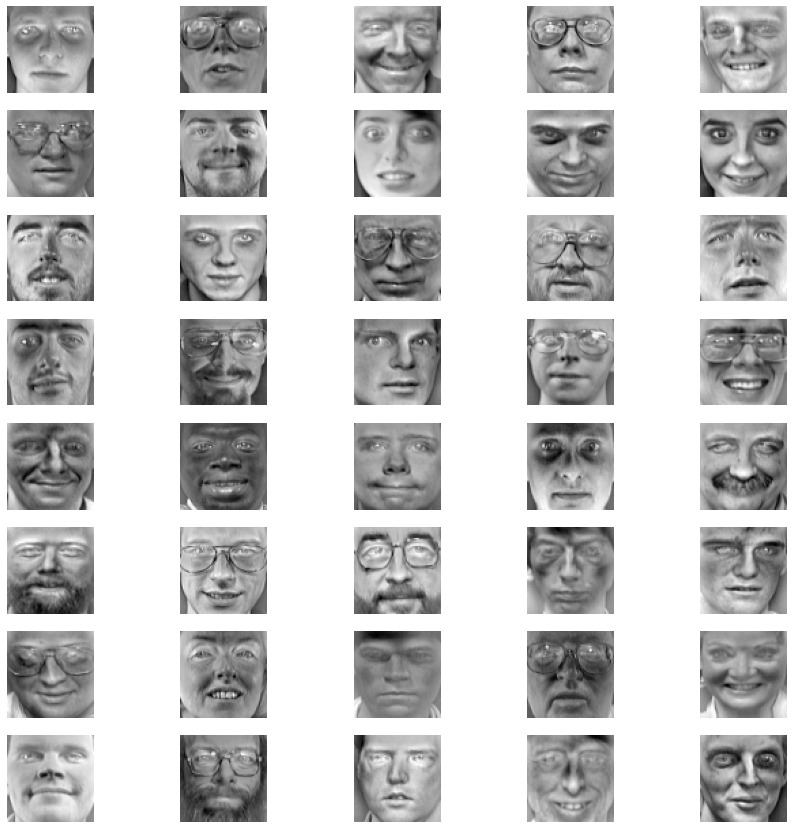

In [6]:
#Ploteamos el nuevo df estandarizado
sujetos = []

for s in sujeto:

    sujetos.append(df_std[df_std['pid'] == s].drop('pid', axis=1).values[0])

n_images = 40

n_cols = 5

n_rows = 8

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
for i, ax in enumerate(axes.ravel()):

    if i < n_images:

        ax.imshow(sujetos[i].reshape((64, 64)), cmap='gray')

        ax.axis('off')

    else:

        ax.remove()

plt.show()


Se encuentra el rosotro promedio y la desviación de los rostros de la base, a continuación estandarizamos las imagenes generando unas nuevas con cambios notorios en sus escalas de grises. 

### 3. Clasificando de forma no supervisada

En esta sección trataremos de clasificar las imágenes de los individuos de forma no supervisada. Para ello utilizaremos los algoritmos de k-medias y k-medoides. Dado que sabemos que el dataset consta de 40 personas diferentes, utilizaremos esta información para pedirle a los algoritmos que encuentren k=40 clusters y examinaremos su precisión.


#### 3.1. Implemente k-medias sobre los datos estandarizados en el punto anterior. Al implementar utilice  `random_state=123` y `n_init=10`. (Esto puede tomar mucho tiempo y requerir mucho RAM, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))

In [7]:
estandarizado

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,-0.499279,-0.350742,-0.302582,-0.394867,-0.137436,0.104823,0.213029,0.194650,0.171179,0.065186,...,1.832118,1.661707,1.596079,1.619697,0.725518,-1.090724,-0.958362,-0.897152,-0.830481,-0.849394
1,0.301122,0.194397,0.185454,0.203658,0.213138,0.290042,0.361396,0.354582,0.311145,0.180304,...,-1.374433,-1.155804,-1.248068,-1.095583,-1.006535,-0.981553,-0.937202,-0.897152,-0.875490,-0.872270
2,-0.453541,-0.176297,0.079359,0.054027,0.169316,0.382651,0.361396,0.247960,0.255159,0.151524,...,-1.750200,-1.292135,-0.997783,-1.161275,-1.139769,-1.003387,-0.979523,-0.963148,-0.897995,-0.872270
3,-1.116730,-1.266574,-1.448407,-1.677422,-1.934122,-2.233557,-2.259746,-1.564604,-1.228480,-1.114767,...,1.756964,1.479932,1.618832,1.751081,2.080073,2.140728,2.194560,2.292623,2.387691,2.376150
4,0.552676,0.586897,0.546177,0.545673,0.497978,0.567869,0.435579,0.434548,0.395124,0.381759,...,-1.048767,-1.133082,-1.020536,-0.964199,-0.873300,-0.850548,-0.810239,-0.765162,-0.762967,-0.757889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.003830,0.325230,0.482520,0.588425,0.497978,0.290042,0.237757,-0.071904,0.003220,0.151524,...,0.153689,0.162064,-0.542720,-1.358352,-0.851094,-0.501202,-0.450509,-0.853155,-0.852985,-0.963775
396,-0.179118,-0.350742,-0.642086,-1.121648,-1.627371,-1.909425,-1.517913,-0.871565,-0.612630,-0.337724,...,0.103587,-0.178764,-0.406201,-0.372968,-0.007273,0.350329,0.628679,0.884722,1.082418,1.323845
397,0.552676,0.521480,0.673491,0.567049,0.541800,0.243737,0.213029,0.141339,0.059206,0.180304,...,-1.023716,-1.201248,-1.157055,-1.029891,-0.962123,-0.872383,-0.916041,-0.765162,-0.897995,-0.666384
398,-1.025256,-1.135741,-1.321093,-1.527791,-1.824568,-2.164100,-2.061924,-1.591259,-1.200487,-0.884532,...,0.504405,0.139342,0.026110,0.283954,0.747724,0.983519,1.073051,1.346690,1.510007,1.621236


In [8]:
# Utilice este espacio para escribir el código.
from sklearn.cluster import KMeans

kmeans_40 = KMeans(n_clusters = 40, random_state = 123, n_init=10)
kmeans_40.fit_predict(estandarizado)


array([ 6, 19,  6, 10,  6, 10,  6, 21,  6,  4, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 22, 27, 27, 17, 17, 21, 21, 21, 14, 14,  8,  8,  8, 14,
       14, 10, 14,  8,  8,  8, 27,  5,  5, 27, 10, 21,  1, 21, 21, 21, 14,
       14, 14, 24, 24, 24, 24, 24, 24, 24,  7,  7, 29, 33, 33, 29,  7,  7,
       29, 33,  6, 19,  7, 19,  7,  6, 19,  7, 29, 19, 37, 37, 37,  1, 37,
        1,  1,  1, 37, 27, 27, 34, 34, 34, 14, 34, 34, 14, 10,  6, 26, 26,
       26, 26, 26, 26, 26, 26, 26, 26, 21, 37, 37, 37, 37, 21, 37,  4, 14,
       21,  8,  8,  1,  1,  3,  8,  3,  3,  3,  3, 31, 31, 31, 31, 31, 31,
       31, 31, 31, 31,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  2,  6,  6,
       14, 14,  2,  6,  3,  6,  6, 21, 21, 22, 22, 21, 38, 38, 21, 38, 38,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 32, 32, 32,  7,  7, 32,  7,
        7,  7, 32, 28, 28, 28,  8,  3,  8,  3,  3,  3, 28,  5, 17, 17, 17,
        5,  8, 17, 17,  8, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14,
       14, 27,  1, 27,  1

In [10]:

print(kmeans_40.labels_)
print(df['pid'])

[ 6 19  6 10  6 10  6 21  6  4 20 20 20 20 20 20 20 20 20 20 22 27 27 17
 17 21 21 21 14 14  8  8  8 14 14 10 14  8  8  8 27  5  5 27 10 21  1 21
 21 21 14 14 14 24 24 24 24 24 24 24  7  7 29 33 33 29  7  7 29 33  6 19
  7 19  7  6 19  7 29 19 37 37 37  1 37  1  1  1 37 27 27 34 34 34 14 34
 34 14 10  6 26 26 26 26 26 26 26 26 26 26 21 37 37 37 37 21 37  4 14 21
  8  8  1  1  3  8  3  3  3  3 31 31 31 31 31 31 31 31 31 31  8  8  8  8
  8  8  8  8  8  8  2  6  6 14 14  2  6  3  6  6 21 21 22 22 21 38 38 21
 38 38 14 14 14 14 14 14 14 14 14 14 32 32 32  7  7 32  7  7  7 32 28 28
 28  8  3  8  3  3  3 28  5 17 17 17  5  8 17 17  8 17  0  0  0  0  0  0
  0  0  0  0 14 14 27  1 27  1 27 14  1 21  2  2 36 36  2  2  2  2 36 36
 27 27 27 27 27 27 27  1 27 27 22 22 22 22 22 22 14 22 22 27 18 18 18 18
 18 18 18 18 18 18  8 39  1 39 39  8 39  8 39  1 11 11 11 23 23 23 23 23
 11 11  5  5  5  5  5  5  5  5  5  5 35 30 30 30 30 35 35 35 35 30 16 16
 16 16 16 16 20 16 16 16 15 15 15 15 15 15 15 15 15

generamos el algoritmo de K-means para los datos estandarizados con los paremetros planteados y nos genera un arreglo de la clasificación de las 400 imagenes estandarizadas.

#### 3.2. Evalúe la precisión del algoritmo para agrupar las imágenes de los individuos. 

In [11]:
# Utilice este espacio para escribir el código.
from sklearn.metrics import silhouette_score
inercia_1=kmeans_40.inertia_
labels_1=kmeans_40.labels_
silhouette_avg_1 = silhouette_score(df_std, labels_1)
print(inercia_1)
print(silhouette_avg_1)

603490.0
0.15932398400009704


(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

#### 3.3. Usando PCA reduzca la dimensión de la matriz de predictores. Retenga el numero de componentes que explican el 95% de la varianza y vuelva a utilizar k-medias para clasificar las imágenes comentado si la precisión mejoró. 

[0.2687645  0.39218825 0.4706024  0.51748836 0.54995054 0.5809583
 0.60479665 0.62551385 0.6440925  0.6605546  0.6758961  0.689433
 0.70176864 0.71320784 0.72415155 0.7337334  0.742403   0.75033706
 0.75793016 0.76512235 0.7718597  0.7783679  0.78431004 0.78984785
 0.7952197  0.8003502  0.80531454 0.810044   0.81425405 0.81836873
 0.8223102  0.8260129  0.8296581  0.83300525 0.8362918  0.8394796
 0.8425606  0.8454685  0.8483171  0.850994   0.8536049  0.85612726
 0.8585955  0.86104774 0.8633782  0.86569005 0.8679165  0.87012005
 0.8721982  0.8742575  0.87628365 0.87823486 0.88013446 0.88198495
 0.88378334 0.88551897 0.8871958  0.88884556 0.89043635 0.892007
 0.893566   0.8950737  0.8965566  0.8980045  0.89942354 0.90081775
 0.90220064 0.9035294  0.90484875 0.90613544 0.907402   0.9086631
 0.9098757  0.911079   0.9122367  0.9133851  0.91452485 0.91561675
 0.91668904 0.9177525  0.918805   0.91984874 0.92086536 0.9218441
 0.9228118  0.9237608  0.9247011  0.92560875 0.92651397 0.92741257
 0.

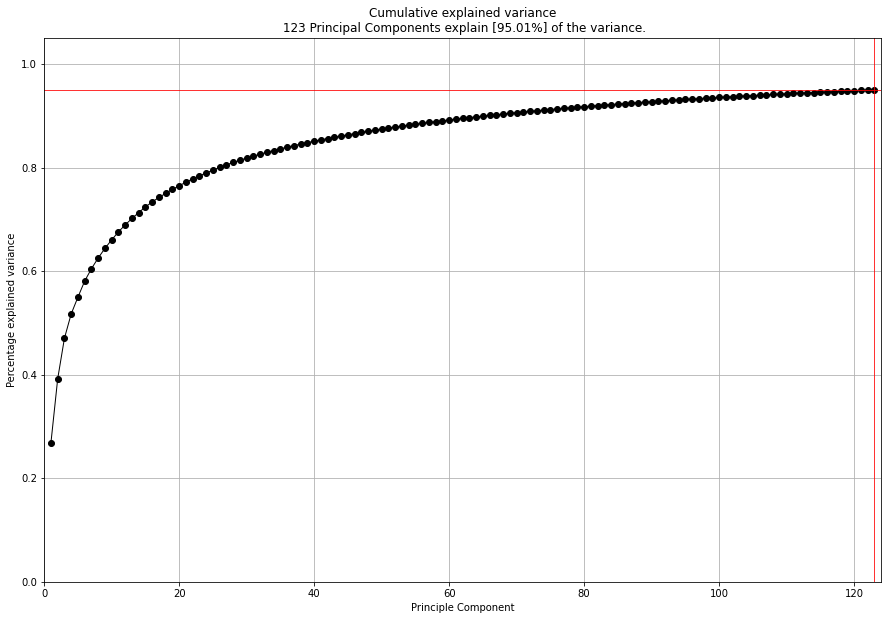

In [12]:
# Utilice este espacio para escribir el código.
from pca import pca
model = pca(n_components=123) #Seleccionamos 3 ya que son todos los valores propios mayores a 1

# Ajustamos el PCA a nuestros datos 
results = model.fit_transform(estandarizado, verbose=False)
results

# Utilice este espacio para escribir el código.
# Cumulative explained variance
print(model.results['explained_var'])
# [0.92461872 0.97768521 0.99478782]

# Explained variance per PC
print(model.results['variance_ratio'])
[0.92461872, 0.05306648, 0.01710261]

# Make plot
fig, ax = model.plot()

In [13]:
#type(results)
results['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123
0,-45.211754,-2.171249,-21.791117,10.220651,9.328467,-4.627451,4.246778,25.300095,-4.776509,0.678466,...,-1.607232,0.378418,-2.026155,-0.141368,1.096186,-0.484065,2.525198,0.100033,1.815661,1.744737
1,-11.845222,-41.902439,3.101277,31.848812,21.220098,4.624699,-11.570634,17.075008,-2.320646,11.436960,...,-0.650841,2.030064,0.145292,0.164832,0.322688,0.096143,-2.878187,-1.779489,-1.206310,-1.015138
2,-39.224873,-7.268750,-11.925260,8.749846,14.045734,-1.901333,5.442456,30.002579,0.253793,1.260290,...,-1.377867,2.674733,1.696667,-0.177838,2.528638,1.146886,-1.304025,2.107009,-2.424007,0.490256
3,-26.594923,78.576630,-0.871078,-2.206540,13.224683,-4.514924,-5.434795,3.306940,-2.959424,-5.273223,...,1.266547,1.663315,1.801840,-1.478788,1.285182,-0.516345,0.219137,-1.209063,1.481276,-0.646031
4,-36.194073,-18.353819,14.731764,25.167894,27.068308,-4.931504,-4.640590,13.614285,2.549790,6.258206,...,-0.322686,1.005461,-0.365565,1.751038,-3.364246,-1.481665,-1.732605,2.394367,-2.701530,-0.046776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,6.379726,-4.842406,20.515945,11.443460,-15.062709,10.199739,3.825216,2.977913,14.559834,-4.394273,...,-0.118369,0.936178,-0.701291,1.016180,-0.291004,-1.337139,1.245333,0.093046,1.079898,-0.671046
396,-38.554348,40.258270,-0.927778,5.599845,7.456630,-9.826070,-5.142937,-8.402349,6.144469,-16.467396,...,2.452475,-0.759542,-2.402869,0.871298,-2.013989,0.021278,-1.569736,0.859216,-2.650052,-0.572860
397,10.798580,-9.572945,24.164686,15.547363,-10.496743,3.329606,-1.627015,-2.380969,22.904016,-5.535487,...,-1.117578,-1.589800,0.790190,0.202090,-0.739561,-0.500383,0.307692,1.861577,2.949457,-1.515950
398,-36.893082,56.892162,-5.202796,3.349000,15.710005,-0.099389,-1.089628,-7.868600,8.937684,-14.325930,...,2.256892,-3.141613,-2.995517,-1.040381,-1.456692,-1.714121,-1.649438,-1.056113,-0.423088,-1.886899


In [14]:
kmeans_123 = KMeans(n_clusters = 40, random_state = 123, n_init=10)
kmeans_123.fit_predict(results['PC'])
labels_2=kmeans_123.labels_

In [15]:
#analizamos los resultados de los clusters despues de realizar PCA
inercia_2=kmeans_123.inertia_
silhouette_avg_2 = silhouette_score(results['PC'], labels_2)
print(inercia_2)
print(silhouette_avg_2)

524227.03125
0.17620489


Despues de ejecutar un PCA donde se eligen 123 componentes principales que reunen el 95% de varianza se
 generar un K-means encontramos que la Inercia disminuye frente al anterior punto pasando de 603490.0625 a 524228.4375 lo cual no indica que hubo un ajuste en los cluster.  Lo mismo sucede con el  coeficiente de Silhoutte que aumenta de 0.1593 a 0.17619264 obteniendo un mejor ajuste. 

#### 3.4. Utilice ahora el algoritmo por  K-medoides (use el mismo random state a los puntos anteriores), comente si mejoró la precisión total y para cada grupo de imágenes.

In [17]:
# Utilice este espacio para escribir el código.
from sklearn_extra.cluster import KMedoids 

#Kmedoides = KMedoids(n_clusters = 40, random_state = 123).fit(results['PC'])
Kmedoides = KMedoids(n_clusters = 40, random_state = 123).fit(estandarizado)


In [18]:
labels_3=Kmedoides.labels_
inercia_3=Kmedoides.inertia_
silhouette_avg_3 = silhouette_score(estandarizado, labels_3)
indices_3=Kmedoides.medoid_indices_
print(inercia_3)
print(silhouette_avg_3)
print(indices_3)

19550.666
0.022396546
[242 201 258 251 293 206 149 148 204 376 146 120 248 399 246 124 286 396
 244 110  45 236 205 127 380  33 363 182  41 302  82 322 291 222  83 240
 143 225  28 171]


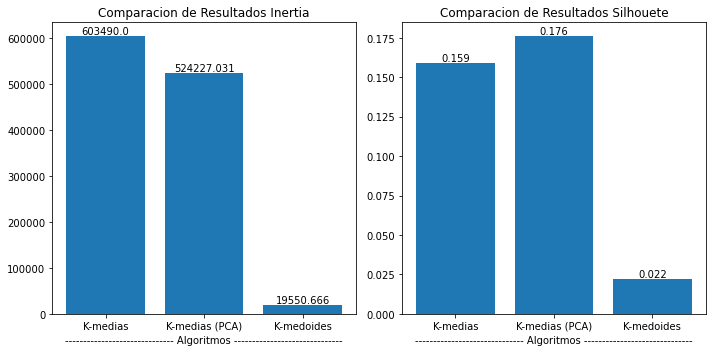

In [19]:
# Comparando Resultados

etiquetas = ['K-medias', 'K-medias (PCA)', 'K-medoides']

valores_inertia = [inercia_1, inercia_2, inercia_3] #aqui ingresas los valores inertia

valores_inertia = [round(x, 3) for x in valores_inertia]
valores_silhouete = [silhouette_avg_1, silhouette_avg_2, silhouette_avg_3] #aqui ingresas los valores silhouete

valores_silhouete = [round(x, 3) for x in valores_silhouete]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1.bar(etiquetas, valores_inertia)

for i in range(len(valores_inertia)):

    ax1.text(i, valores_inertia[i], valores_inertia[i], ha='center', va='bottom')

ax1.set_title('Comparacion de Resultados Inertia')

ax1.set_xlabel(30*'-' + ' Algoritmos ' + 30*'-')

ax1.set_xticks(range(len(etiquetas)))

ax1.set_xticklabels(etiquetas, rotation=0)
ax2.bar(etiquetas, valores_silhouete)

for i in range(len(valores_silhouete)):

    ax2.text(i, valores_silhouete[i], valores_silhouete[i], ha='center', va='bottom')

ax2.set_title('Comparacion de Resultados Silhouete')

ax2.set_xlabel(30*'-' + ' Algoritmos ' + 30*'-')

ax2.set_xticks(range(len(etiquetas)))

ax2.set_xticklabels(etiquetas, rotation=0)
plt.tight_layout()

plt.show()

De acuerdo a los resultados encontramos que obtener un coeficiente de Silhoutte muy bajo puede ser influenciado por los valores atipicos pueden afectar la elección del medoide

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Listas de etiquetas verdaderas y predicciones
etiquetas_verdaderas = df['pid']
predicciones = pd.DataFrame(labels_1)

# Crear la matriz de confusión
matriz_confusion = confusion_matrix(etiquetas_verdaderas, predicciones)

# Calcular métricas de error
accuracy = accuracy_score(etiquetas_verdaderas, predicciones)
precision = precision_score(etiquetas_verdaderas, predicciones,average='micro')
recall = recall_score(etiquetas_verdaderas, predicciones,average='micro')
f1 = f1_score(etiquetas_verdaderas, predicciones,average='micro')

print("Matriz de Confusión:")
print(matriz_confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Matriz de Confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 2 0 ... 3 0 0]]
Accuracy: 0.02
Precision: 0.02
Recall: 0.02
F1-Score: 0.02


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Listas de etiquetas verdaderas y predicciones
etiquetas_verdaderas = df['pid']
predicciones = pd.DataFrame(labels_3)

# Crear la matriz de confusión
matriz_confusion = confusion_matrix(etiquetas_verdaderas, predicciones)

# Calcular métricas de error
accuracy = accuracy_score(etiquetas_verdaderas, predicciones)
precision = precision_score(etiquetas_verdaderas, predicciones,average='micro')
recall = recall_score(etiquetas_verdaderas, predicciones,average='micro')
f1 = f1_score(etiquetas_verdaderas, predicciones,average='micro')

print("Matriz de Confusión:")
print(matriz_confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Matriz de Confusión:
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 3 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
Accuracy: 0.0075
Precision: 0.0075
Recall: 0.0075
F1-Score: 0.0075


### 4. Número de clusters óptimo

En el punto anteriores utilizamos nuestro conocimiento previo sobre los datos para elegir el número de clusters. En este punto, verifique si 40 es realmente el número de cluster que usted elegiría según los criterios estudiados en los cuadernos teóricos. Discuta los resultados obtenidos.

In [22]:
# Utilice este espacio para escribir el código.

varianza_intra_cluster = []
silhouettes = []
for k in range (1, 40): # Evaluamos entre 1 a 40 clusters posibles
    #Kmeands = KMeans(n_clusters = k, random_state = 123, n_init=10).fit(estandarizado)
    Kmedoides = KMedoids(n_clusters = k, random_state = 123).fit(estandarizado)
    varianza_intra_cluster.append(Kmedoides.inertia_)
    try:
        silhouette = silhouette_score(estandarizado, Kmedoides.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
    y[k] = Kmedoides.labels_

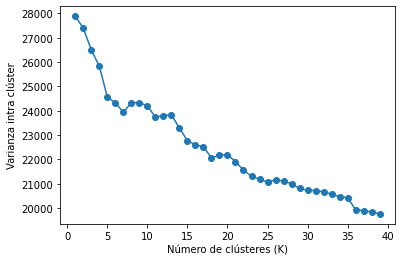

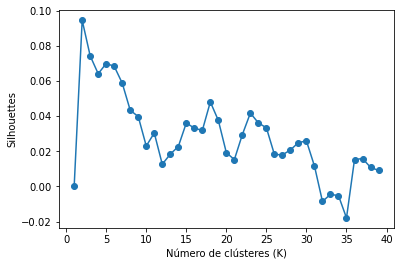

In [23]:
plt.plot(range(1, 40), varianza_intra_cluster, marker='o')

plt.xlabel('Número de clústeres (K)')

plt.ylabel('Varianza intra clúster')

plt.show()
plt.plot(range(1, 40), silhouettes, marker='o')

plt.xlabel('Número de clústeres (K)')

plt.ylabel('Silhouettes')

plt.show()

De acuerdo a los resultados podriamos elegir entre 36 y 40 Clusters dado que la varianza intra grupos es mas baja y el resultado del score de Silhouettes es "estable" en ese rangop de clusters.